# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("diabetes.csv", delimiter=",")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [8]:
# missing values check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# possible missing value in bloodpressure, insulin, glucose and BMI as 0
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [10]:
filter_insulin = df[df['Insulin'] > 0]

(filter_insulin == 0).sum()

Pregnancies                  57
Glucose                       1
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           1
DiabetesPedigreeFunction      0
Age                           0
Outcome                     264
dtype: int64

In [11]:
# remove possible missing value in variables
filter_all_zero = filter_insulin[(filter_insulin['Glucose'] > 0) & (filter_insulin['BMI'] > 0)]
(filter_all_zero == 0).sum()

Pregnancies                  56
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     262
dtype: int64

In [12]:
filter_all_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


In [13]:
filter_all_zero.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
# average for people with diabetes
filter_all_zero[filter_all_zero['Outcome'] == 1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.0
mean,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,0.625585,35.938462,1.0
std,3.916153,29.839388,13.021518,9.642770,132.699898,6.734687,0.405910,10.634705,0.0
min,0.000000,78.000000,30.000000,7.000000,14.000000,22.900000,0.127000,21.000000,1.0
25%,1.000000,124.250000,66.500000,26.000000,127.500000,31.600000,0.329750,27.250000,1.0
50%,3.000000,144.500000,74.000000,33.000000,169.500000,34.600000,0.546000,33.000000,1.0
75%,7.000000,171.750000,82.000000,39.750000,239.250000,38.350000,0.786500,43.000000,1.0
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,60.000000,1.0


In [15]:
# average for people without diabetes
filter_all_zero[filter_all_zero['Outcome'] == 0].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.0
mean,2.721374,111.431298,68.969466,27.251908,130.854962,31.750763,0.472168,28.347328,0.0
std,2.617844,24.642133,11.892841,10.434135,102.626177,6.794971,0.299240,8.989008,0.0
min,0.000000,56.000000,24.000000,7.000000,15.000000,18.200000,0.085000,21.000000,0.0
25%,1.000000,94.000000,60.000000,18.250000,66.000000,26.125000,0.261000,22.000000,0.0
50%,2.000000,107.500000,70.000000,27.000000,105.000000,31.250000,0.413500,25.000000,0.0
75%,4.000000,126.000000,76.000000,34.000000,163.750000,36.100000,0.624250,30.000000,0.0
max,13.000000,197.000000,106.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


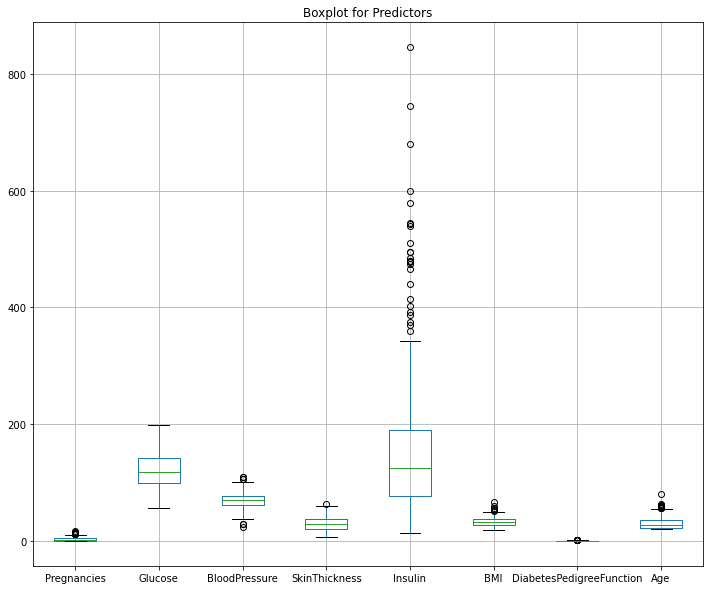

In [27]:
# identify outliers 
plt.figure(figsize=(12,10))
filter_all_zero.drop('Outcome',axis=1).boxplot()
plt.title('Boxplot for Predictors')
plt.show()

In [28]:
Q1 = filter_all_zero.quantile(0.25)
Q3 = filter_all_zero.quantile(0.75)
IQR = Q3 - Q1

outliers = ((filter_all_zero < (Q1 - 1.5 * IQR)) | (filter_all_zero > (Q3 + 1.5 * IQR)))

In [31]:
outliers.sum(axis=0)

Pregnancies                 11
Glucose                      0
BloodPressure                7
SkinThickness                1
Insulin                     25
BMI                          6
DiabetesPedigreeFunction    12
Age                         13
Outcome                      0
dtype: int64

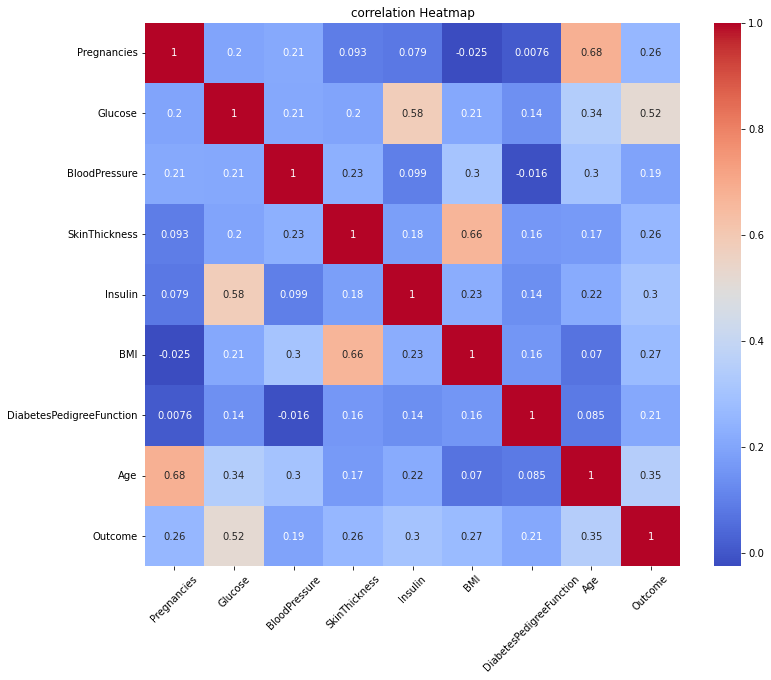

In [26]:
# correlation between predictors
correlation_matrix = filter_all_zero.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')

plt.title('correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


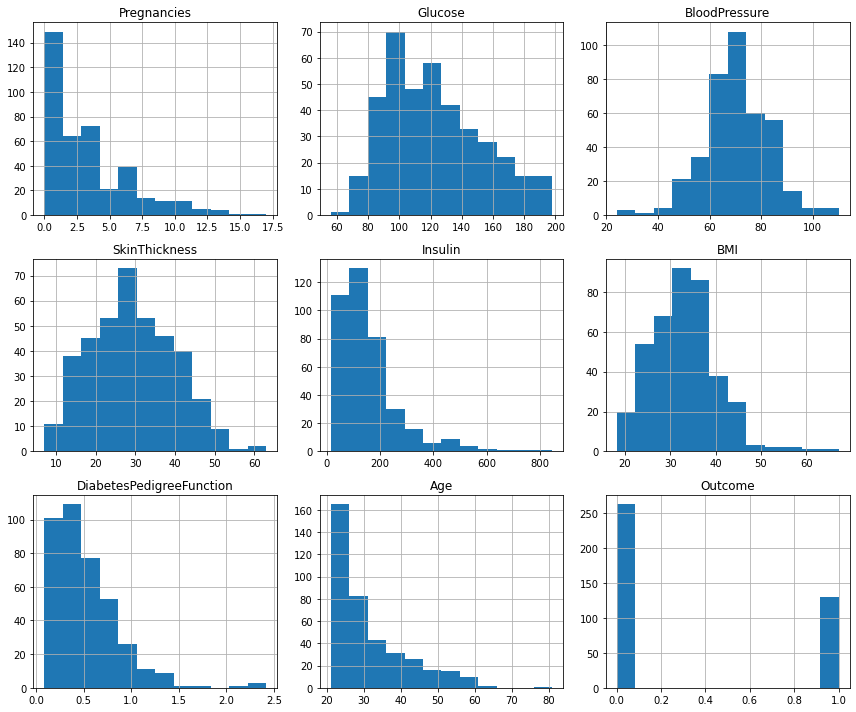

In [19]:
# distribution of each variable
filter_all_zero.hist(figsize=(12,10),bins=12)
plt.tight_layout()
plt.show()

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.